Goal: find which model performs the best on this dataset

In [2]:
# we import libraries that will be needed

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt

# Read in the dataset and do basic checks

In [8]:
loans_df = pd.read_csv('modeling_challenge_data_2017.12.27.csv')
loans_df.describe()

,loanNumber,monthOriginated,default,var1,var2,var4,var5,var6,var7,var8,...,var89,var90,var91,var92,var93,var94,var95,var96,var97,var98
count,52918.000000,52918.000000,52918.000000,52918.000000,52619.000000,5.291800e+04,51879.000000,52174.000000,52139.000000,52918.000000,...,52918.000000,52918.000000,52918.000000,5.261900e+04,52619.000000,5.187900e+04,5.187900e+04,51879.000000,5.187900e+04,5.187900e+04
mean,26459.500000,201446.631449,0.091198,0.005480,4.618731,8.144960e+04,15329.111240,9164.297945,66.485729,0.009467,...,46.454477,0.047054,27.204713,5.776432e+04,23441.117752,4.718874e+04,3.584723e+04,178.984194,1.661558e+05,2.003850e+05
std,15276.255109,88.982428,0.287893,0.077814,3.076202,6.350256e+04,15747.599221,13505.183972,26.427349,0.108614,...,41.849424,0.333253,11.768903,4.994096e+04,20910.281548,4.483767e+04,3.282418e+04,1993.890078,1.570253e+05,1.721624e+05
min,1.000000,201201.000000,0.000000,0.000000,0.000000,4.800000e+03,0.000000,0.000000,0.000000,0.000000,...,-10.000000,0.000000,2.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,8.000000e+02
25%,13230.250000,201405.000000,0.000000,0.000000,2.000000,5.289825e+04,4292.000000,1280.250000,48.200000,0.000000,...,7.000000,0.000000,19.000000,2.829600e+04,9600.000000,1.865300e+04,1.730000e+04,0.000000,4.460750e+04,6.896850e+04
50%,26459.500000,201502.000000,0.000000,0.000000,4.000000,7.000000e+04,10637.000000,4263.000000,71.700000,0.000000,...,30.000000,0.000000,26.000000,4.561500e+04,17500.000000,3.695300e+04,2.810000e+04,0.000000,1.276040e+05,1.598000e+05
75%,39688.750000,201508.000000,0.000000,0.000000,6.000000,9.589700e+04,21224.500000,11249.500000,89.300000,0.000000,...,100.000000,0.000000,34.000000,7.148200e+04,30900.000000,6.309350e+04,4.470000e+04,0.000000,2.423505e+05,2.842935e+05
max,52918.000000,201602.000000,1.000000,3.000000,40.000000,8.700000e+06,368681.000000,205543.000000,151.400000,6.000000,...,100.000000,15.000000,126.000000,2.652799e+06,834300.000000,1.269783e+06,1.641300e+06,296368.000000,4.127799e+06,4.392634e+06


In [9]:
# some variables are dates:
# monthOriginated, and var14

# set the date column to be the date
loans_df['var14'] = pd.to_datetime(loans_df['var14'])

def date_covert(dstring):
    dt_date = dt.datetime.strptime(str(dstring) + '01', '%Y%m%d')
    return dt_date

loans_df['monthOriginated'] = loans_df['monthOriginated'].apply(date_covert)

def date_month(dt_date):
    return dt_date.month

def date_year(dt_date):
    return dt_date.year

def date_day(dt_date):
    return dt_date.day

#translate these date values into numbers, so that the machine learning models can work with them

loans_df['Orig_month'] = loans_df['monthOriginated'].apply(date_month)
loans_df['Orig_year'] = loans_df['monthOriginated'].apply(date_year)

loans_df['var14_day'] = loans_df['var14'].apply(date_day)
loans_df['var14_month'] = loans_df['var14'].apply(date_month)
loans_df['var14_year'] = loans_df['var14'].apply(date_year)

# var3 looks like State
# we can assume that variables with only 1 and 0 values are only "True" or "False",
# but except for the variable "default", we don't know what they mean
# all other variables are numerical
# it's hard to tell if some of the negative values should be dropped, 
# because we don't know what are they supposed to be encoding

In [10]:
loans_df.describe()

,loanNumber,default,var1,var2,var4,var5,var6,var7,var8,var9,...,var94,var95,var96,var97,var98,Orig_month,Orig_year,var14_day,var14_month,var14_year
count,52918.000000,52918.000000,52918.000000,52619.000000,5.291800e+04,51879.000000,52174.000000,52139.000000,52918.000000,52918.000000,...,5.187900e+04,5.187900e+04,51879.000000,5.187900e+04,5.187900e+04,52918.000000,52918.000000,52918.0,52918.000000,52918.000000
mean,26459.500000,0.091198,0.005480,4.618731,8.144960e+04,15329.111240,9164.297945,66.485729,0.009467,0.013625,...,4.718874e+04,3.584723e+04,178.984194,1.661558e+05,2.003850e+05,6.805680,2014.398258,1.0,6.709135,1997.317642
std,15276.255109,0.287893,0.077814,3.076202,6.350256e+04,15747.599221,13505.183972,26.427349,0.108614,0.128161,...,4.483767e+04,3.282418e+04,1993.890078,1.570253e+05,1.721624e+05,3.488582,0.895653,0.0,3.386876,7.126903
min,1.000000,0.000000,0.000000,0.000000,4.800000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,8.000000e+02,1.000000,2012.000000,1.0,1.000000,1944.000000
25%,13230.250000,0.000000,0.000000,2.000000,5.289825e+04,4292.000000,1280.250000,48.200000,0.000000,0.000000,...,1.865300e+04,1.730000e+04,0.000000,4.460750e+04,6.896850e+04,4.000000,2014.000000,1.0,4.000000,1994.000000
50%,26459.500000,0.000000,0.000000,4.000000,7.000000e+04,10637.000000,4263.000000,71.700000,0.000000,0.000000,...,3.695300e+04,2.810000e+04,0.000000,1.276040e+05,1.598000e+05,7.000000,2015.000000,1.0,7.000000,1999.000000
75%,39688.750000,0.000000,0.000000,6.000000,9.589700e+04,21224.500000,11249.500000,89.300000,0.000000,0.000000,...,6.309350e+04,4.470000e+04,0.000000,2.423505e+05,2.842935e+05,10.000000,2015.000000,1.0,10.000000,2002.000000
max,52918.000000,1.000000,3.000000,40.000000,8.700000e+06,368681.000000,205543.000000,151.400000,6.000000,4.000000,...,1.269783e+06,1.641300e+06,296368.000000,4.127799e+06,4.392634e+06,12.000000,2016.000000,1.0,12.000000,2012.000000


As we can see, some data is missing.

For now, for missing values, we fill the missing values in the given column with an average for the given column.

In [11]:
columns_incomplete = list(loans_df.columns.values)
#print(columns_incomplete)

columns_incomplete.remove('monthOriginated')
columns_incomplete.remove('default')
columns_incomplete.remove('var3')
columns_incomplete.remove('var14')
columns_incomplete.remove('loanNumber')

#print(columns_incomplete)

for col in columns_incomplete:
    loans_df[col] = loans_df[col].fillna(loans_df[col].mean(), axis = 0)

loans_df.describe()


loans_df['loanNumber'] = loans_df.index

We also want to check if some variables are correlated already.

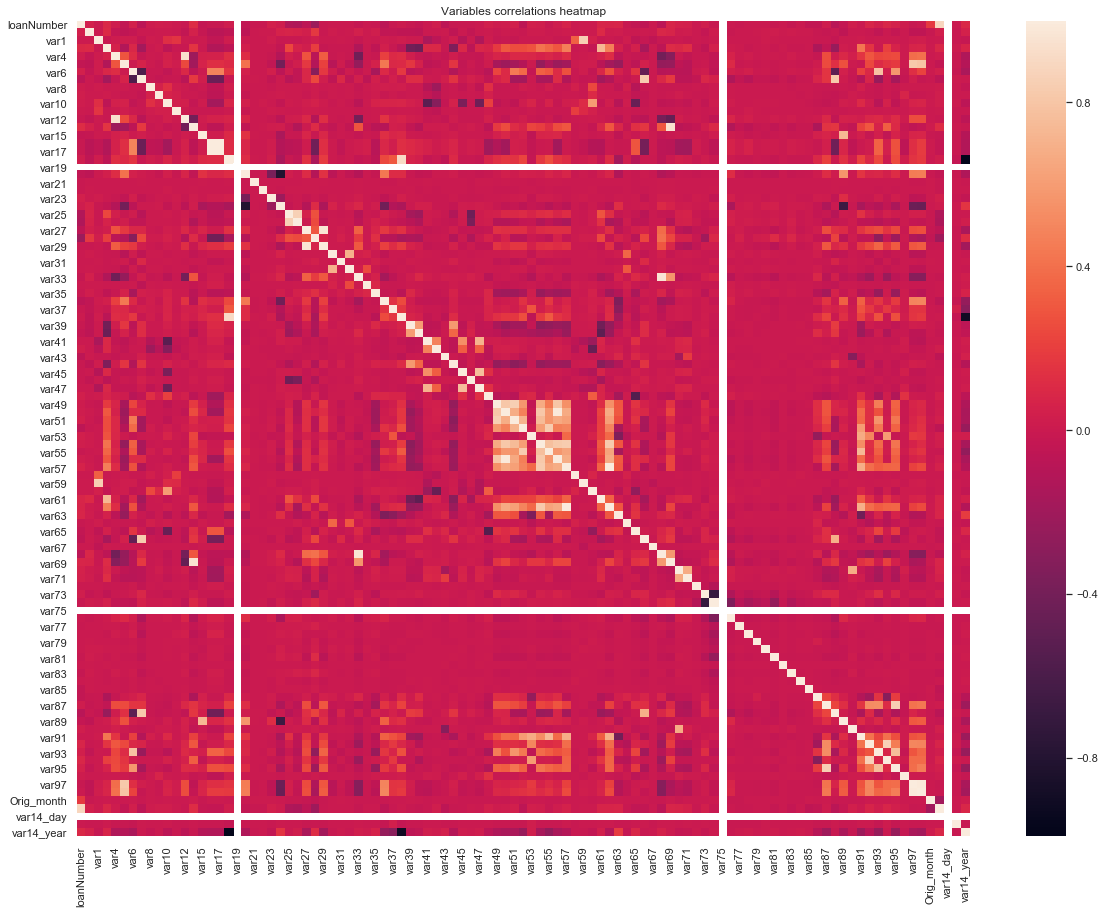

In [12]:
# plot a heatmap to see if the variables are not somewhat correlated

import seaborn as sns

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

import matplotlib.pyplot as plt 

plt.figure(figsize = (20, 15))

sns.heatmap(loans_df.corr()).set_title('Variables correlations heatmap')

plt.show()


In [22]:
# check Variance Inflation Factors (VIF) among the variables used in this regression

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


X = add_constant(loans_df)
vif_results = pd.Series([variance_inflation_factor(X.values, i) 
           for i in range(X.shape[1])], 
              index=X.columns)
vif_results.to_csv('cp_test_vif_results.csv')

# See which model performs the best

We will first try simpler models that are easy to understand. Then, we will experiment with more complex models, and see if they perform better.

## Logistic Regression

In [14]:
from sklearn import linear_model

# select just the corresponding data for logistic regression

# we will drop the datetime columns, because we have that information in other columns
loan_parameters = loans_df.drop(['default', 'monthOriginated', 'var3', 'var14'], axis=1)

loan_outcome = loans_df['default']

# see how does the model perform

n_samples = len(loan_outcome)
threshold = int(.9*n_samples)
print(threshold)

# we train on the first 90% of the sample size
X_train = loan_parameters[:threshold]
y_train = loan_outcome[:threshold]
X_test = loan_parameters[threshold:]
y_test = loan_outcome[threshold:]

logistic = linear_model.LogisticRegression()

print('LogisticRegression score: %f'
      % logistic.fit(X_train, y_train).score(X_test, y_test))

#print('Logistic Regression coefficients: %f', logistic.coef_)

#look at coefficients with the highest value
results_df = pd.DataFrame(
    {'parameter': loan_parameters.columns,
     'coefficient': logistic.coef_[0,:]
    })

results_df['coef_abs'] = results_df['coefficient'].abs()

print('Variables with highest importance (top 10): ')

results_df = results_df.sort_values(by=['coef_abs'], ascending=False)
print(results_df[:10])

47626
LogisticRegression score: 0.860544
Variables with highest importance (top 10): 
    coefficient parameter  coef_abs
25     0.009667     var27  0.009667
42    -0.002480     var44  0.002480
87    -0.002001     var89  0.002001
15    -0.001842     var17  0.001842
14    -0.001842     var16  0.001842
37    -0.001253     var39  0.001253
35    -0.001051     var37  0.001051
38    -0.000802     var40  0.000802
36    -0.000801     var38  0.000801
86    -0.000678     var88  0.000678


So, according to logistic regression, these are the most important variables in this model.

Let's try another model and see if the same variables seem to be important.

## Decision Tree 

In [15]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier 

In [11]:
# this function writes a pseudocode of a tree, in terms of if-else statements

def get_code(tree, feature_names):
        left      = tree.tree_.children_left
        right     = tree.tree_.children_right
        threshold = tree.tree_.threshold
        features  = [feature_names[i] for i in tree.tree_.feature]
        value = tree.tree_.value

        def recurse(left, right, threshold, features, node):
                if (threshold[node] != -2):
                        print "if ( " + features[node] + " <= " + str(threshold[node]) + " ) {"
                        if left[node] != -1:
                                recurse (left, right, threshold, features,left[node])
                        print "} else {"
                        if right[node] != -1:
                                recurse (left, right, threshold, features,right[node])
                        print "}"
                else:
                        print "return " + str(value[node])

        recurse(left, right, threshold, features, 0)

# example call:
get_code(dt_e, loan_parameters.columns)

if ( var28 <= 0.16520000249147415 ) {
if ( var28 <= 0.12205000221729279 ) {
if ( var12 <= 751.4143371582031 ) {
if ( var69 <= 42.67754364013672 ) {
if ( var6 <= 26166.0 ) {
if ( var29 <= 21550.0 ) {
if ( var67 <= 0.42112991213798523 ) {
return [[104.   0.]]
} else {
if ( var67 <= 0.44444674253463745 ) {
if ( var86 <= 0.1435493379831314 ) {
return [[8. 0.]]
} else {
if ( var37 <= 148.0 ) {
if ( var37 <= 85.0 ) {
return [[2. 0.]]
} else {
return [[0. 6.]]
}
} else {
return [[4. 0.]]
}
}
} else {
if ( var64 <= 0.04683275893330574 ) {
if ( var35 <= 0.3661888986825943 ) {
if ( var26 <= 0.12916667014360428 ) {
return [[146.   0.]]
} else {
if ( var26 <= 0.13809524476528168 ) {
if ( var58 <= 0.0003174288140144199 ) {
return [[0. 1.]]
} else {
return [[1. 0.]]
}
} else {
return [[7. 0.]]
}
}
} else {
if ( var87 <= 24513.0 ) {
if ( var18 <= 106.0 ) {
if ( var29 <= 14200.0 ) {
if ( var98 <= 81369.0 ) {
if ( var15 <= 2.5 ) {
return [[0. 5.]]
} else {
if ( var92 <= 51634.0 ) {
return [[6. 0.]]
} e

if ( var94 <= 23106.0 ) {
return [[34.  0.]]
} else {
if ( var47 <= 15.5 ) {
if ( var15 <= 0.5 ) {
return [[2. 0.]]
} else {
return [[0. 3.]]
}
} else {
if ( var57 <= 9.5 ) {
if ( var12 <= 122.18339920043945 ) {
if ( var38 <= 218.5 ) {
return [[0. 3.]]
} else {
return [[1. 0.]]
}
} else {
if ( var86 <= 0.2845300883054733 ) {
return [[31.  0.]]
} else {
if ( var20 <= 0.5 ) {
if ( var30 <= 4.958533763885498 ) {
return [[14.  0.]]
} else {
if ( var46 <= 10.0 ) {
return [[0. 2.]]
} else {
return [[3. 0.]]
}
}
} else {
return [[0. 3.]]
}
}
}
} else {
return [[37.  0.]]
}
}
}
} else {
return [[0. 2.]]
}
}
} else {
if ( var57 <= 30.0 ) {
if ( var27 <= 299.4310760498047 ) {
return [[0. 1.]]
} else {
if ( var53 <= 0.5 ) {
if ( var31 <= 2.0353037416934967 ) {
return [[1. 0.]]
} else {
return [[0. 1.]]
}
} else {
if ( var61 <= 2.5 ) {
return [[196.   0.]]
} else {
if ( var46 <= -0.5 ) {
return [[0. 1.]]
} else {
if ( var87 <= 3565.5 ) {
return [[0. 1.]]
} else {
return [[35.  0.]]
}
}
}
}
}
} els

if ( var39 <= 51.5 ) {
if ( var35 <= 1.040833294391632 ) {
if ( var34 <= 0.374213770031929 ) {
if ( var68 <= 0.11675326898694038 ) {
if ( var69 <= 30.10448455810547 ) {
if ( var68 <= 0.048665279522538185 ) {
if ( var91 <= 33.5 ) {
return [[0. 5.]]
} else {
if ( var93 <= 67466.0 ) {
return [[4. 0.]]
} else {
return [[0. 1.]]
}
}
} else {
if ( var28 <= 0.13984999805688858 ) {
return [[21.  0.]]
} else {
if ( var28 <= 0.14820000529289246 ) {
if ( var4 <= 70050.0 ) {
return [[0. 3.]]
} else {
if ( var15 <= 9.5 ) {
return [[8. 0.]]
} else {
if ( var68 <= 0.07091166451573372 ) {
if ( var97 <= 549830.5 ) {
return [[0. 4.]]
} else {
return [[1. 0.]]
}
} else {
return [[3. 0.]]
}
}
}
} else {
return [[19.  0.]]
}
}
}
} else {
if ( var86 <= 0.3080482929944992 ) {
if ( var48 <= 0.5 ) {
if ( var17 <= 667.5 ) {
return [[0. 1.]]
} else {
return [[9. 0.]]
}
} else {
return [[0. 3.]]
}
} else {
if ( var32 <= 1.0824258923530579 ) {
return [[77.  0.]]
} else {
if ( var52 <= 5.5 ) {
return [[0. 2.]]
} el

if ( var38 <= 449.0 ) {
return [[122.   0.]]
} else {
if ( var98 <= 130511.0 ) {
return [[2. 0.]]
} else {
return [[0. 1.]]
}
}
} else {
return [[0. 1.]]
}
} else {
if ( var92 <= 62592.5 ) {
if ( var7 <= 97.0 ) {
if ( loanNumber <= 43417.0 ) {
if ( var34 <= 1.8301650285720825 ) {
if ( var41 <= 21.0 ) {
return [[0. 4.]]
} else {
if ( var91 <= 20.0 ) {
if ( var54 <= 4.5 ) {
return [[2. 0.]]
} else {
return [[0. 4.]]
}
} else {
return [[11.  0.]]
}
}
} else {
if ( var86 <= 0.02681201510131359 ) {
if ( var95 <= 1950.0 ) {
return [[3. 0.]]
} else {
return [[0. 4.]]
}
} else {
if ( var74 <= 0.5 ) {
if ( var64 <= 0.024984480813145638 ) {
return [[11.  0.]]
} else {
if ( var33 <= 0.3114797919988632 ) {
return [[0. 2.]]
} else {
return [[3. 0.]]
}
}
} else {
return [[50.  0.]]
}
}
}
} else {
if ( var63 <= 0.40625 ) {
if ( var52 <= 2.5 ) {
return [[1. 0.]]
} else {
return [[0. 6.]]
}
} else {
return [[4. 0.]]
}
}
} else {
return [[24.  0.]]
}
} else {
if ( var32 <= 3.2860039472579956 ) {
return 

}
} else {
if ( var93 <= 5550.0 ) {
return [[0. 6.]]
} else {
if ( var26 <= 0.06111111305654049 ) {
if ( var44 <= 35.5 ) {
return [[11.  0.]]
} else {
if ( var67 <= 0.48303990066051483 ) {
return [[0. 2.]]
} else {
return [[1. 0.]]
}
}
} else {
if ( var54 <= 6.5 ) {
return [[0. 6.]]
} else {
return [[2. 0.]]
}
}
}
}
}
}
} else {
return [[0. 4.]]
}
} else {
if ( var9 <= 1.5 ) {
if ( var38 <= 145.5 ) {
if ( var4 <= 27750.0 ) {
return [[30.  0.]]
} else {
if ( var38 <= 24.0 ) {
return [[0. 2.]]
} else {
if ( var18 <= 71.5 ) {
if ( var64 <= 0.05065561644732952 ) {
return [[38.  0.]]
} else {
if ( var6 <= 8942.5 ) {
return [[0. 1.]]
} else {
return [[1. 0.]]
}
}
} else {
if ( var18 <= 85.5 ) {
if ( var13 <= 27.550000190734863 ) {
if ( var6 <= 17735.5 ) {
if ( var5 <= 3538.0 ) {
return [[19.  0.]]
} else {
if ( var18 <= 83.5 ) {
if ( var89 <= 9.0 ) {
return [[12.  0.]]
} else {
if ( var32 <= 3.3244874477386475 ) {
return [[2. 0.]]
} else {
return [[0. 3.]]
}
}
} else {
return [[0. 3.]]
}
}
}

return [[0. 3.]]
}
} else {
if ( var50 <= 6.5 ) {
return [[0. 6.]]
} else {
return [[3. 0.]]
}
}
} else {
return [[34.  0.]]
}
}
} else {
if ( var33 <= 0.20595695823431015 ) {
return [[68.  0.]]
} else {
if ( var33 <= 0.34380580484867096 ) {
if ( var29 <= 27100.0 ) {
if ( var18 <= 319.5 ) {
if ( var63 <= 0.596875011920929 ) {
if ( var27 <= 266.8627624511719 ) {
if ( var28 <= 0.19225000590085983 ) {
return [[1. 0.]]
} else {
return [[0. 1.]]
}
} else {
return [[50.  0.]]
}
} else {
if ( var95 <= 21850.0 ) {
if ( var40 <= 15.5 ) {
if ( var80 <= 0.5 ) {
if ( var28 <= 0.23465000092983246 ) {
return [[57.  0.]]
} else {
if ( var93 <= 14250.0 ) {
return [[0. 1.]]
} else {
return [[1. 0.]]
}
}
} else {
return [[0. 1.]]
}
} else {
if ( var74 <= 0.5 ) {
return [[1. 0.]]
} else {
return [[0. 2.]]
}
}
} else {
if ( var63 <= 0.8062500059604645 ) {
if ( var86 <= 0.6226180791854858 ) {
if ( var44 <= 9.5 ) {
if ( var64 <= 0.011792463716119528 ) {
return [[0. 1.]]
} else {
return [[14.  0.]]
}
} else 

return [[0. 3.]]
}
} else {
return [[21.  0.]]
}
}
}
} else {
if ( var44 <= 7.5 ) {
if ( var54 <= 5.5 ) {
if ( var67 <= 0.9209067821502686 ) {
return [[5. 0.]]
} else {
return [[0. 2.]]
}
} else {
return [[22.  0.]]
}
} else {
return [[166.   0.]]
}
}
}
}
}
} else {
if ( var39 <= 12.5 ) {
if ( var40 <= 5.0 ) {
return [[6. 0.]]
} else {
if ( var30 <= 0.672394186258316 ) {
return [[2. 0.]]
} else {
return [[0. 6.]]
}
}
} else {
return [[11.  0.]]
}
}
} else {
if ( var29 <= 28100.0 ) {
if ( var31 <= 16.436298370361328 ) {
if ( var27 <= 702.8392639160156 ) {
if ( var66 <= 22.5 ) {
return [[18.  0.]]
} else {
if ( var29 <= 17887.5 ) {
if ( var44 <= 23.5 ) {
if ( var44 <= 13.0 ) {
if ( var25 <= 0.5 ) {
return [[0. 4.]]
} else {
if ( var7 <= 86.95000076293945 ) {
return [[9. 0.]]
} else {
if ( var36 <= 3.0 ) {
return [[0. 3.]]
} else {
return [[1. 0.]]
}
}
}
} else {
return [[11.  0.]]
}
} else {
if ( var30 <= 1.4384482502937317 ) {
return [[0. 6.]]
} else {
if ( var44 <= 28.0 ) {
return [[0.

return [[15.  0.]]
}
} else {
return [[0. 3.]]
}
} else {
return [[21.  0.]]
}
}
}
} else {
return [[0. 2.]]
}
}
}
} else {
if ( var7 <= 44.64999961853027 ) {
return [[0. 2.]]
} else {
if ( loanNumber <= 16527.5 ) {
if ( var38 <= 110.0 ) {
return [[0. 4.]]
} else {
if ( var94 <= 24317.0 ) {
if ( var69 <= 29.81206512451172 ) {
return [[7. 0.]]
} else {
if ( var65 <= 90.70000076293945 ) {
return [[2. 0.]]
} else {
return [[0. 4.]]
}
}
} else {
return [[20.  0.]]
}
}
} else {
if ( var41 <= 33.80425834655762 ) {
if ( loanNumber <= 19842.5 ) {
return [[60.  0.]]
} else {
if ( var97 <= 30194.0 ) {
if ( var44 <= 17.5 ) {
if ( var94 <= 26863.5 ) {
return [[0. 5.]]
} else {
return [[3. 0.]]
}
} else {
return [[9. 0.]]
}
} else {
if ( var18 <= 154.0 ) {
return [[61.  0.]]
} else {
if ( var63 <= 0.5872211158275604 ) {
if ( var88 <= 81.45000076293945 ) {
return [[32.  0.]]
} else {
if ( var13 <= 20.55500030517578 ) {
if ( var76 <= 0.5 ) {
return [[38.  0.]]
} else {
if ( var28 <= 0.215700000524520

}
} else {
if ( var88 <= 55.5 ) {
return [[56.  0.]]
} else {
if ( var69 <= 25.463706016540527 ) {
return [[31.  0.]]
} else {
if ( var13 <= 17.230000495910645 ) {
if ( var15 <= 1.5 ) {
return [[1. 0.]]
} else {
return [[0. 4.]]
}
} else {
if ( var53 <= 8.5 ) {
if ( var26 <= 0.07417582720518112 ) {
if ( var18 <= 111.5 ) {
return [[0. 2.]]
} else {
if ( var51 <= 2.5 ) {
if ( var91 <= 19.0 ) {
return [[3. 0.]]
} else {
return [[0. 2.]]
}
} else {
return [[23.  0.]]
}
}
} else {
if ( var66 <= 67.5 ) {
if ( var52 <= 7.5 ) {
return [[2. 0.]]
} else {
return [[0. 1.]]
}
} else {
return [[0. 5.]]
}
}
} else {
if ( var64 <= 0.015250416938215494 ) {
if ( var13 <= 25.039999961853027 ) {
return [[5. 0.]]
} else {
if ( var28 <= 0.17714999616146088 ) {
return [[0. 2.]]
} else {
return [[1. 0.]]
}
}
} else {
return [[46.  0.]]
}
}
}
}
}
}
} else {
return [[0. 3.]]
}
} else {
return [[69.  0.]]
}
} else {
return [[0. 3.]]
}
} else {
if ( var4 <= 50002.5 ) {
if ( var65 <= 76.0 ) {
return [[0. 1.]]
} e

return [[2. 0.]]
}
}
}
} else {
if ( var38 <= 106.5 ) {
if ( var2 <= 6.5 ) {
return [[8. 0.]]
} else {
if ( var52 <= 6.0 ) {
return [[0. 4.]]
} else {
return [[3. 0.]]
}
}
} else {
if ( var68 <= 0.14494463801383972 ) {
if ( var43 <= 100.0 ) {
return [[186.   0.]]
} else {
if ( var55 <= 20.0 ) {
return [[3. 0.]]
} else {
return [[0. 1.]]
}
}
} else {
if ( var93 <= 28050.0 ) {
return [[9. 0.]]
} else {
return [[0. 2.]]
}
}
}
}
} else {
if ( var65 <= 94.29999923706055 ) {
if ( var37 <= 149.0 ) {
if ( var68 <= 0.10939177125692368 ) {
return [[0. 2.]]
} else {
return [[4. 0.]]
}
} else {
return [[0. 3.]]
}
} else {
return [[7. 0.]]
}
}
}
}
}
} else {
return [[0. 2.]]
}
} else {
if ( var37 <= 184.5 ) {
if ( var31 <= 3.9225558042526245 ) {
return [[0. 2.]]
} else {
return [[7. 0.]]
}
} else {
return [[0. 4.]]
}
}
}
}
}
}
}
} else {
if ( var55 <= 17.5 ) {
if ( var86 <= 0.31136375665664673 ) {
if ( var30 <= 5.947791576385498 ) {
if ( var87 <= 35388.5 ) {
if ( var93 <= 22450.0 ) {
if ( var27 <= 

}
} else {
if ( var62 <= 34.5 ) {
return [[0. 6.]]
} else {
return [[1. 0.]]
}
}
}
} else {
if ( var44 <= 77.0 ) {
if ( var39 <= 17.5 ) {
return [[91.  0.]]
} else {
if ( var32 <= 3.8281723856925964 ) {
return [[0. 1.]]
} else {
return [[1. 0.]]
}
}
} else {
if ( var7 <= 96.9000015258789 ) {
return [[0. 2.]]
} else {
return [[1. 0.]]
}
}
}
} else {
if ( var16 <= 696.5 ) {
if ( var12 <= 628.9017639160156 ) {
return [[53.  0.]]
} else {
if ( loanNumber <= 35384.5 ) {
if ( var34 <= 5.078072786331177 ) {
if ( var41 <= 33.30425834655762 ) {
return [[66.  0.]]
} else {
if ( var93 <= 57100.0 ) {
if ( var63 <= 0.3580586165189743 ) {
return [[50.  0.]]
} else {
if ( var95 <= 12350.0 ) {
return [[0. 2.]]
} else {
if ( var28 <= 0.2280000001192093 ) {
if ( var68 <= 0.15496012568473816 ) {
if ( var97 <= 272537.5 ) {
return [[59.  0.]]
} else {
if ( var45 <= 63.0 ) {
if ( var39 <= 17.5 ) {
return [[13.  0.]]
} else {
return [[0. 1.]]
}
} else {
return [[0. 1.]]
}
}
} else {
return [[0. 1.]]
}
} else

}
}
} else {
if ( var44 <= 5.5 ) {
if ( var33 <= 0.20256410539150238 ) {
if ( var38 <= 137.5 ) {
return [[4. 0.]]
} else {
return [[0. 2.]]
}
} else {
return [[0. 5.]]
}
} else {
return [[6. 0.]]
}
}
} else {
return [[66.  0.]]
}
} else {
if ( var98 <= 222417.5 ) {
if ( var12 <= 2737.8272705078125 ) {
if ( var34 <= 0.7230542898178101 ) {
if ( var69 <= 15.489886283874512 ) {
return [[0. 2.]]
} else {
if ( var52 <= 3.5 ) {
return [[0. 1.]]
} else {
return [[18.  0.]]
}
}
} else {
return [[133.   0.]]
}
} else {
if ( var12 <= 2762.572509765625 ) {
return [[0. 2.]]
} else {
if ( var44 <= 14.5 ) {
return [[31.  0.]]
} else {
if ( var32 <= 3.1888633966445923 ) {
return [[9. 0.]]
} else {
if ( var17 <= 672.5 ) {
if ( var34 <= 0.6592630594968796 ) {
return [[1. 0.]]
} else {
return [[0. 4.]]
}
} else {
if ( var13 <= 15.925000190734863 ) {
return [[9. 0.]]
} else {
if ( var28 <= 0.22789999842643738 ) {
return [[0. 1.]]
} else {
return [[1. 0.]]
}
}
}
}
}
}
}
} else {
if ( var68 <= 0.09857672825

return [[0. 1.]]
}
}
} else {
return [[7. 0.]]
}
}
} else {
if ( var89 <= -0.5 ) {
return [[0. 1.]]
} else {
return [[10.  0.]]
}
}
} else {
return [[0. 6.]]
}
} else {
return [[5. 0.]]
}
} else {
if ( var52 <= 15.0 ) {
if ( var34 <= 8.929394245147705 ) {
return [[21.  0.]]
} else {
return [[0. 1.]]
}
} else {
return [[0. 2.]]
}
}
} else {
return [[12.  0.]]
}
} else {
if ( var31 <= 46.18162536621094 ) {
if ( var55 <= 5.0 ) {
return [[0. 1.]]
} else {
return [[46.  0.]]
}
} else {
return [[0. 2.]]
}
}
} else {
return [[0. 3.]]
}
}
}
} else {
return [[17.  0.]]
}
} else {
return [[22.  0.]]
}
} else {
if ( var93 <= 11150.0 ) {
if ( var33 <= 0.20389610528945923 ) {
return [[0. 2.]]
} else {
return [[9. 0.]]
}
} else {
return [[0. 6.]]
}
}
}
}
}
}
}
} else {
return [[17.  0.]]
}
} else {
if ( var50 <= 6.57120418548584 ) {
return [[0. 6.]]
} else {
if ( var92 <= 156311.5 ) {
return [[7. 0.]]
} else {
return [[0. 2.]]
}
}
}
} else {
if ( var35 <= 1.0426730513572693 ) {
return [[0. 4.]]
} el

return [[0. 4.]]
}
} else {
if ( var33 <= 0.4379807710647583 ) {
return [[21.  0.]]
} else {
if ( loanNumber <= 33710.5 ) {
return [[0. 2.]]
} else {
return [[3. 0.]]
}
}
}
} else {
return [[18.  0.]]
}
} else {
return [[0. 3.]]
}
} else {
if ( var6 <= 3448.0 ) {
if ( var69 <= 39.05848503112793 ) {
if ( var37 <= 25.5 ) {
return [[0. 4.]]
} else {
if ( var29 <= 27975.0 ) {
if ( var26 <= 0.5357142984867096 ) {
if ( var4 <= 54700.0 ) {
if ( var4 <= 47900.0 ) {
return [[6. 0.]]
} else {
if ( var53 <= 7.0 ) {
return [[1. 0.]]
} else {
return [[0. 3.]]
}
}
} else {
return [[20.  0.]]
}
} else {
return [[0. 2.]]
}
} else {
if ( var42 <= 71.5 ) {
return [[0. 6.]]
} else {
return [[3. 0.]]
}
}
}
} else {
if ( var45 <= 14.0 ) {
return [[1. 0.]]
} else {
return [[0. 8.]]
}
}
} else {
return [[0. 8.]]
}
}
} else {
if ( var37 <= 126.0 ) {
return [[ 0. 12.]]
} else {
if ( var30 <= 2.633379578590393 ) {
return [[0. 5.]]
} else {
if ( var5 <= 1110.5 ) {
return [[0. 1.]]
} else {
return [[6. 0.]]
}
}
}

In [16]:
dt_e = DecisionTreeClassifier(criterion="entropy", splitter="best", random_state=0)
#dt.fit(train_data, train_labels)
dt_e.fit(X_train, y_train)

print 'Accuracy (a decision tree with information gain used for measuring the quality of the split):', dt_e.score(X_test, y_test)

dt_g = DecisionTreeClassifier(criterion="gini", splitter="best", random_state=0)
#dt.fit(train_data, train_labels)
dt_g.fit(X_train, y_train)

print 'Accuracy (a decision tree with Gini impurity used for measuring the quality of the split):', dt_g.score(X_test, y_test)



Accuracy (a decision tree with information gain used for measuring the quality of the split): 0.7859032501889645
Accuracy (a decision tree with Gini impurity used for measuring the quality of the split): 0.7435752078609221


Again, say something about what this means for this model

## Random Forest 

Since the performance of Decision Trees didn't outperform Logistic Regression, we shall try more advanced methods.

In [17]:
rfc_100 = RandomForestClassifier(n_estimators=100)
#rfc.fit(train_data, train_labels)
rfc_100.fit(X_train, y_train)

print 'Accuracy (a random forest with 100 estimators):', rfc_100.score(X_test, y_test)

rfc_90 = RandomForestClassifier(n_estimators=90)
#rfc.fit(train_data, train_labels)
rfc_90.fit(X_train, y_train)

print 'Accuracy (a random forest with 90 estimators):', rfc_90.score(X_test, y_test)

rfc_95 = RandomForestClassifier(n_estimators=95)
#rfc.fit(train_data, train_labels)
rfc_95.fit(X_train, y_train)

print 'Accuracy (a random forest with 95 estimators):', rfc_95.score(X_test, y_test)

Accuracy (a random forest with 100 estimators): 0.8594104308390023
Accuracy (a random forest with 90 estimators): 0.858843537414966
Accuracy (a random forest with 95 estimators): 0.8594104308390023


So, we see we get a different accuracy of predictions depending on the number of estimators.
Let's see what is the optimal number.

In [18]:
# to save computation from GridSearch, we just try different n_estimators.

n_estimators = []
accuracy = []

for i in range(80, 120):
    n_estimators.append(i)
    rfc_i = RandomForestClassifier(n_estimators=i)
    rfc_i.fit(X_train, y_train)
    accuracy.append(rfc_i.score(X_test, y_test))

rfc_results_df = pd.DataFrame(
    {'n_estimators': n_estimators,
     'accuracy': accuracy
    })

rfc_results_df = rfc_results_df.sort_values(by=['accuracy'], ascending=False)
print(rfc_results_df[:5])

    accuracy  n_estimators
29  0.859788           109
4   0.859788            84
6   0.859788            86
20  0.859599           100
28  0.859599           108


So, we get the highest accuracy with 109 estimators.

The code below would run a more complete search; unfortunately, it's too computationally expensive for my computer now.

In [ ]:
from sklearn.model_selection import GridSearchCV

gridsearch_forest = RandomForestClassifier()

params = {
    "n_estimators": [80, 100, 120],
    "max_depth": [5,8,15],
    "min_samples_leaf" : [1, 2, 4]
}

clf = GridSearchCV(gridsearch_forest, param_grid=params, n_jobs=-1, cv=3 )
clf.fit(X_train, y_train)

In [ ]:
clf.best_params_

In [ ]:
clf.best_score_

## AdaBoost 

We can also try the AdaBoost.

In [19]:
abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5), n_estimators=109, learning_rate=0.1)

abc.fit(X_train, y_train)
print 'Accuracy (adaboost with decision trees):', abc.score(X_test, y_test)

Accuracy (adaboost with decision trees): 0.8571428571428571


Our accuracy is still in the same range. Let's try another boosting method.

## Gradient Boost

It will be interesting to compare the accuracy of Gradient Boosting with the previous methods.

In [20]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=109, learning_rate=1.0, max_depth=1, random_state=0)
clf.fit(X_train, y_train)

print 'Accuracy (Gradient Boost):', clf.score(X_test, y_test)                 

Accuracy (Gradient Boost): 0.8599773242630385


Again, here is another Grid Serach that could help us increase accuracy.

In [ ]:
from sklearn.model_selection import GridSearchCV

gridsearch_forest = GradientBoostingClassifier()

params = {
    "n_estimators": [80, 100, 120],
    "max_depth": [1, 2, 3],
    "min_samples_leaf" : [1, 2, 4]
}

clf = GridSearchCV(gridsearch_forest, param_grid=params, n_jobs=-1, cv=3 )
clf.fit(X_train, y_train)

In [ ]:
clf.best_params_

In [ ]:
clf.best_score_

It looks that for this dataset, if we don't use the information from the time variable, it is hard to beat the accuracy of Logistic Regression.

We could have tried GridSearchCV on a bigger grid, and that could have helped us find the right parameters for these models that would have lead to a higher accuracy.